In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.75, 4.0)
import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")
import mne
mne.utils.set_log_level('error')
import numpy as np
import local
from models.preprocessing import utils
import time

In [2]:
d = "../../../../data/reinhartlab/multimodal/"
ext_in = "-epo.fif.gz"
box = utils.select_dataset(d,ext_in); box

In [4]:
def do_erp(f):
    t = time.time()
    print(f[len(d):])
    erp = mne.read_epochs(f).filter(1.,30.,n_jobs=4).apply_baseline((-.2,0.))
    erps = {
        'V_COR':erp['visual']['Correctness>0'].average(),
        'V_ERR':erp['visual']['Correctness<0'].average(),
        'A_COR':erp['audio']['Correctness>0'].average(),
        'A_ERR':erp['audio']['Correctness<0'].average()
    }
    print(time.time()-t)
    return erps

files = [d+f+ext_in for f in utils.get_selection(box)]

In [9]:
erps = [do_erp(f) for f in files]

In [2]:
g_erp = mne.grand_average(erp,interpolate_bads=False,drop_bads=False);

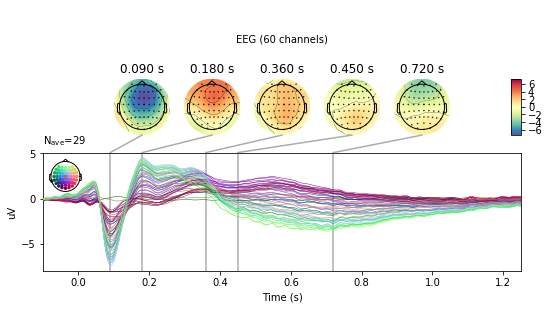

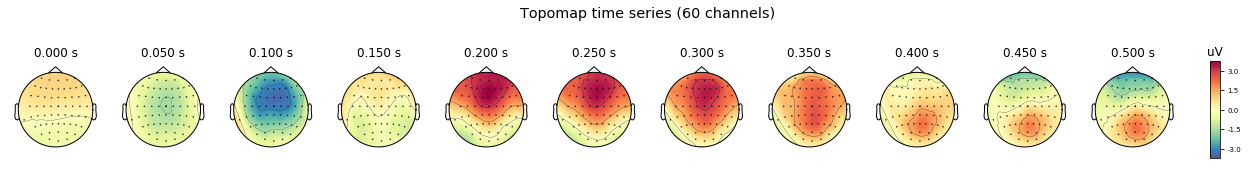

In [60]:
g_erp.plot_joint(times=[.09,.18,.36,.45,.72],ts_args={'xlim':(-.1,1.25)},topomap_args={'cmap':'Spectral_r'})
g_erp.plot_topomap(times=[0.,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5],average=.1,cmap='Spectral_r',title='Topomap time series (60 channels)');